# All inits

In [4]:
import numpy
import pandas
import os
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
# This is upposed to enhance default pandas display
pandas.set_option('display.width',75)


## Read data with minimal cleaning

In [5]:
def load_dataframe(file_name,title):
    print ('load %s' % file_name)
    df = pandas.read_pickle('../PandasStore/'+file_name+'.pkl')
    print('%s contains %d lines' % (title,len(df)))
    df.metadata={'title':title}
    return df

train_dataframe = load_dataframe('clean_training','Train')
challenge_dataframe = load_dataframe('clean_challenge','Challenge')

load clean_training
Train contains 404290 lines
load clean_challenge
Challenge contains 2345796 lines


## Generate common words for all pairs in training

In [6]:
def common_words(question1,question2):
    return set(question1.split())&set(question2.split())

# common_words('alain charroux','alain charroux')
#train_dataframe['common_words'] = train_dataframe.apply(lambda r: common_words(r.question1,r.question2), axis=1)
train_dataframe['common_words'] = train_dataframe.apply(lambda r: list(set(r.question1.split())&set(r.question2.split())), axis=1)
train_dataframe['nb_common_words'] = train_dataframe.apply(lambda r: len(list(set(r.question1.split())&set(r.question2.split()))), axis=1)

In [7]:
train_dataframe['common_words']

0         [is, to, the, step, share, by, invest, in, Wha...
1                       [the, (Koh-i-Noor), Kohinoor, What]
2                                         [How, speed, can]
3                                                        []
4                                               [Which, in]
                                ...                        
404285    [are, there, latest, version?, the, How, keywo...
404286                     [is, there, after, life, death?]
404287                                              [coin?]
404288                                                 [of]
404289       [is, cousin?, with, have, to, like, What, sex]
Name: common_words, Length: 404290, dtype: object

In [8]:
train_dataframe['nb_words_question1-question2'] = train_dataframe.apply(lambda r: len(list(set(r.question1.split())-set(r.question2.split()))), axis=1)

In [9]:
train_dataframe['nb_words_question2-question1'] = train_dataframe.apply(lambda r: len(list(set(r.question2.split())-set(r.question1.split()))), axis=1)

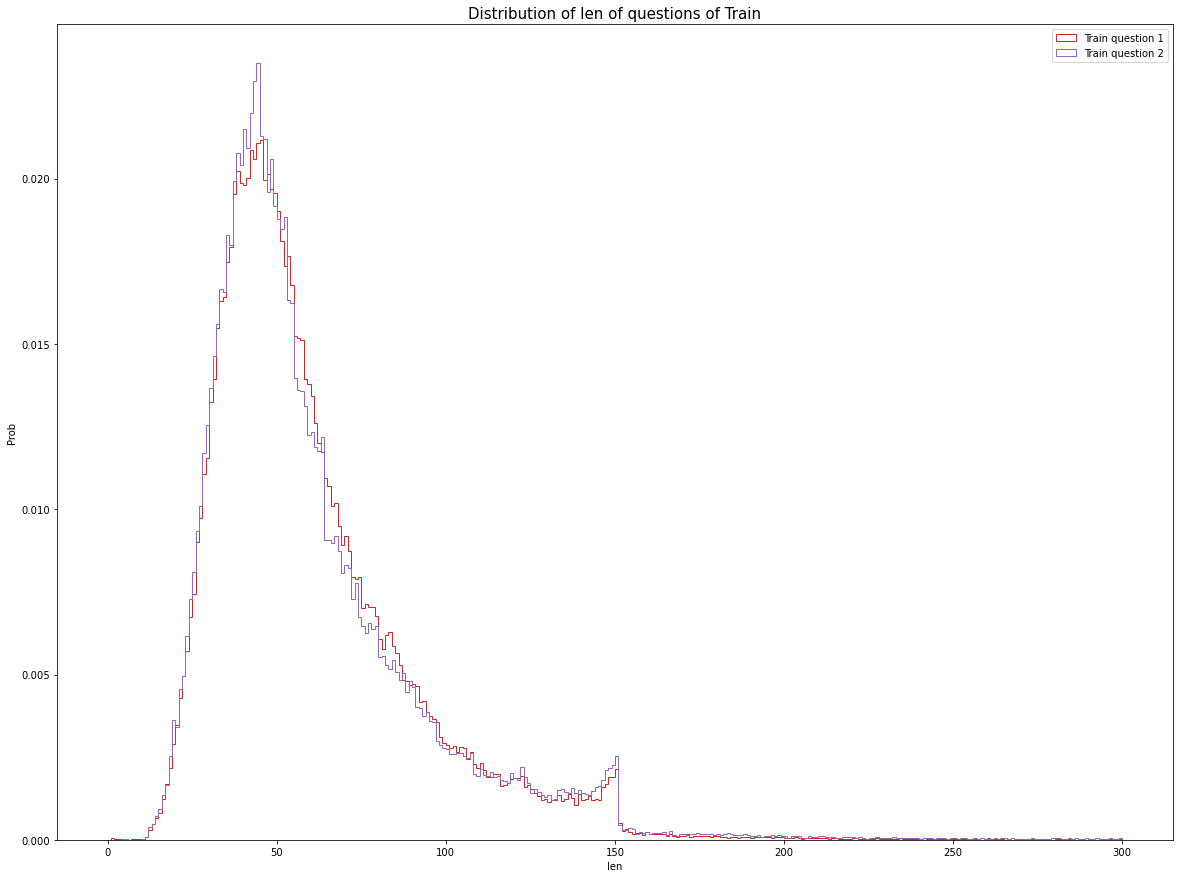

In [10]:
# strangely the first one does not work
palette = sns.color_palette()
plot.figure(figsize=(20, 15))
plot.hist(train_dataframe['question1'].str.len(),bins=300,range=[0,300],density=True,color=palette[3],label='Train question 1',histtype='step')
plot.hist(train_dataframe['question2'].str.len(),bins=300,range=[0,300],density=True,color=palette[4],label='Train question 2',alpha=1,histtype='step')
plot.title('Distribution of len of questions of Train', fontsize=15)
plot.xlabel('len')
plot.ylabel('Prob')
plot.legend()




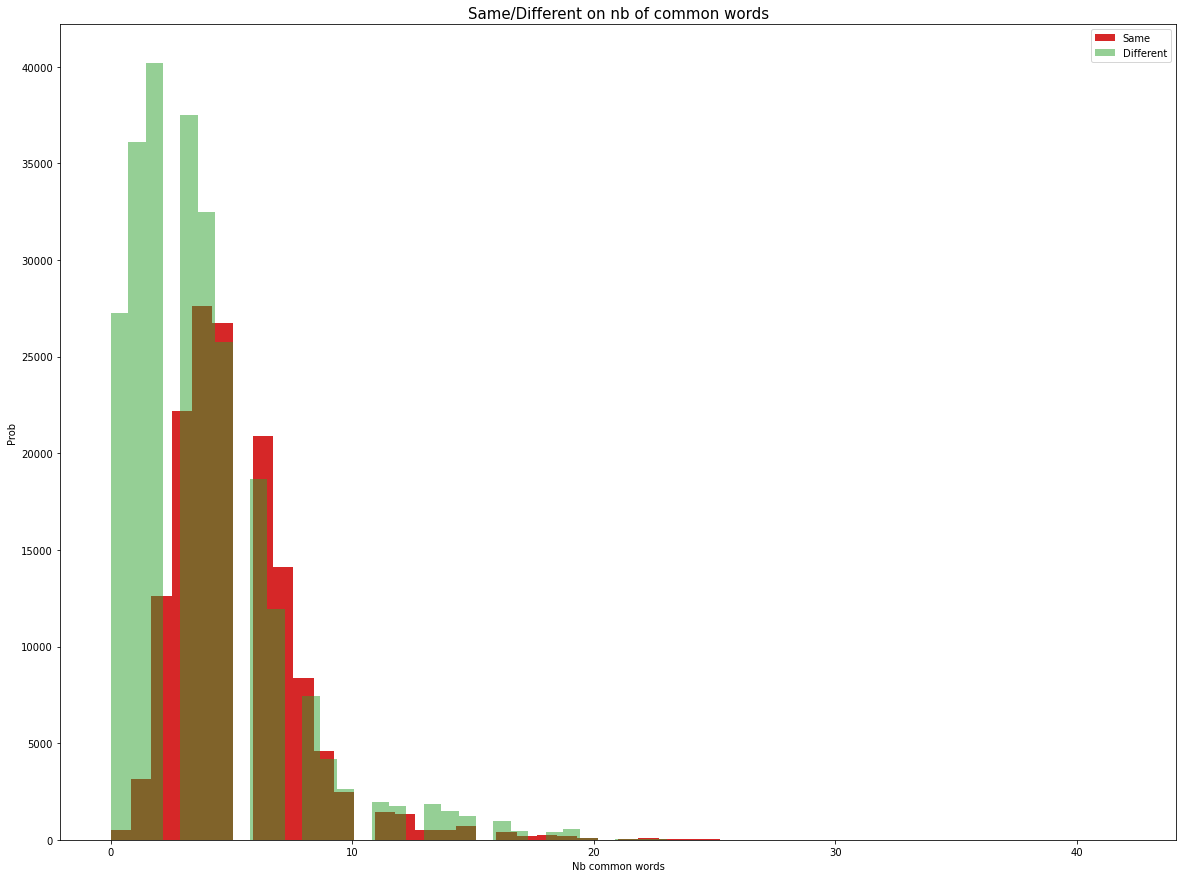

In [11]:
palette = sns.color_palette()
plot.figure(figsize=(20, 15))
plot.hist(train_dataframe['nb_common_words'][train_dataframe['is_duplicate']==1],bins=50,color=palette[3],label='Same')
plot.hist(train_dataframe['nb_common_words'][train_dataframe['is_duplicate']==0],bins=50,color=palette[2],label='Different',alpha = 0.5)
plot.title('Same/Different on nb of common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Prob')
plot.legend()

In [12]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_dataframe['is_duplicate'], train_dataframe['nb_common_words']))

Original AUC: 0.6807806132003075


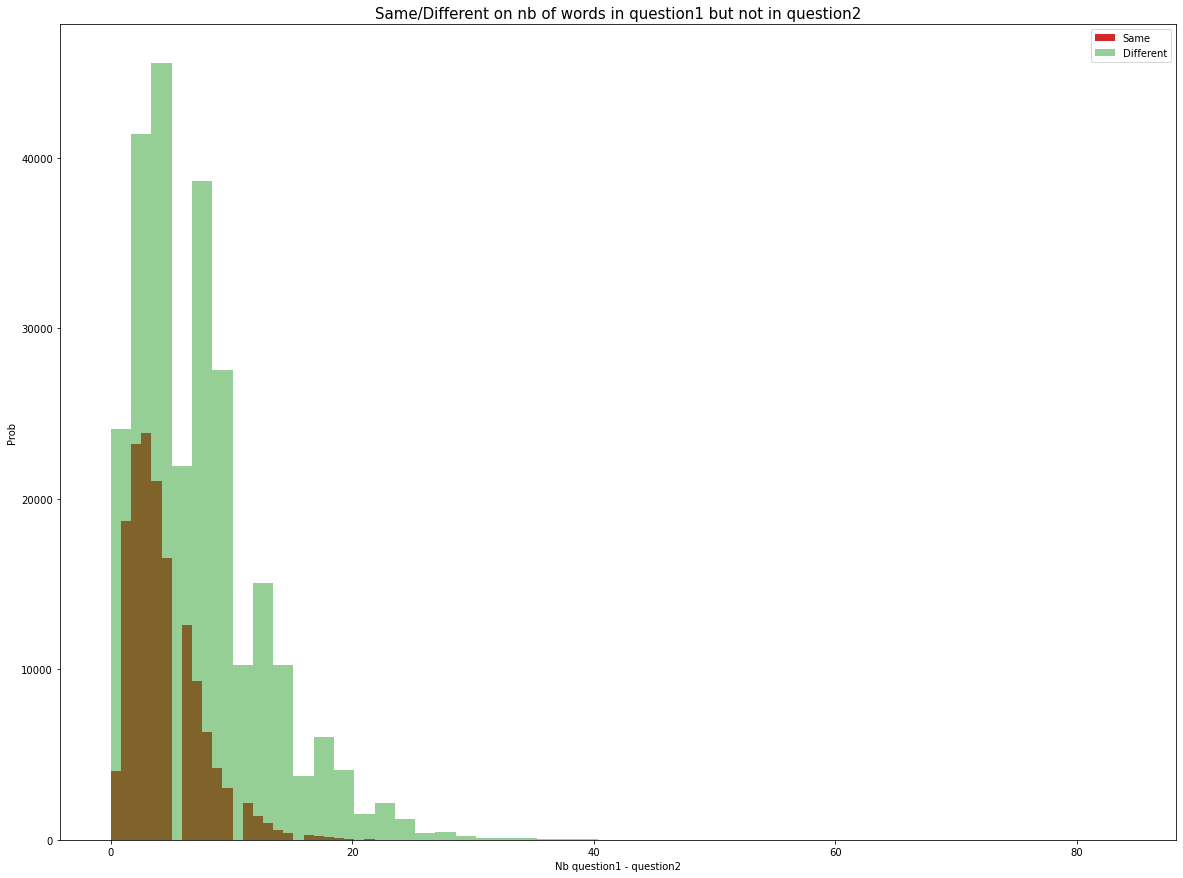

In [13]:
palette = sns.color_palette()
plot.figure(figsize=(20, 15))
plot.hist(train_dataframe['nb_words_question1-question2'][train_dataframe['is_duplicate']==1],bins=50,color=palette[3],label='Same')
plot.hist(train_dataframe['nb_words_question1-question2'][train_dataframe['is_duplicate']==0],bins=50,color=palette[2],label='Different',alpha = 0.5)
plot.title('Same/Different on nb of words in question1 but not in question2', fontsize=15)
plot.xlabel('Nb question1 - question2')
plot.ylabel('Prob')
plot.legend()

In [14]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_dataframe['is_duplicate'], train_dataframe['nb_words_question1-question2']))

Original AUC: 0.3206848227303282


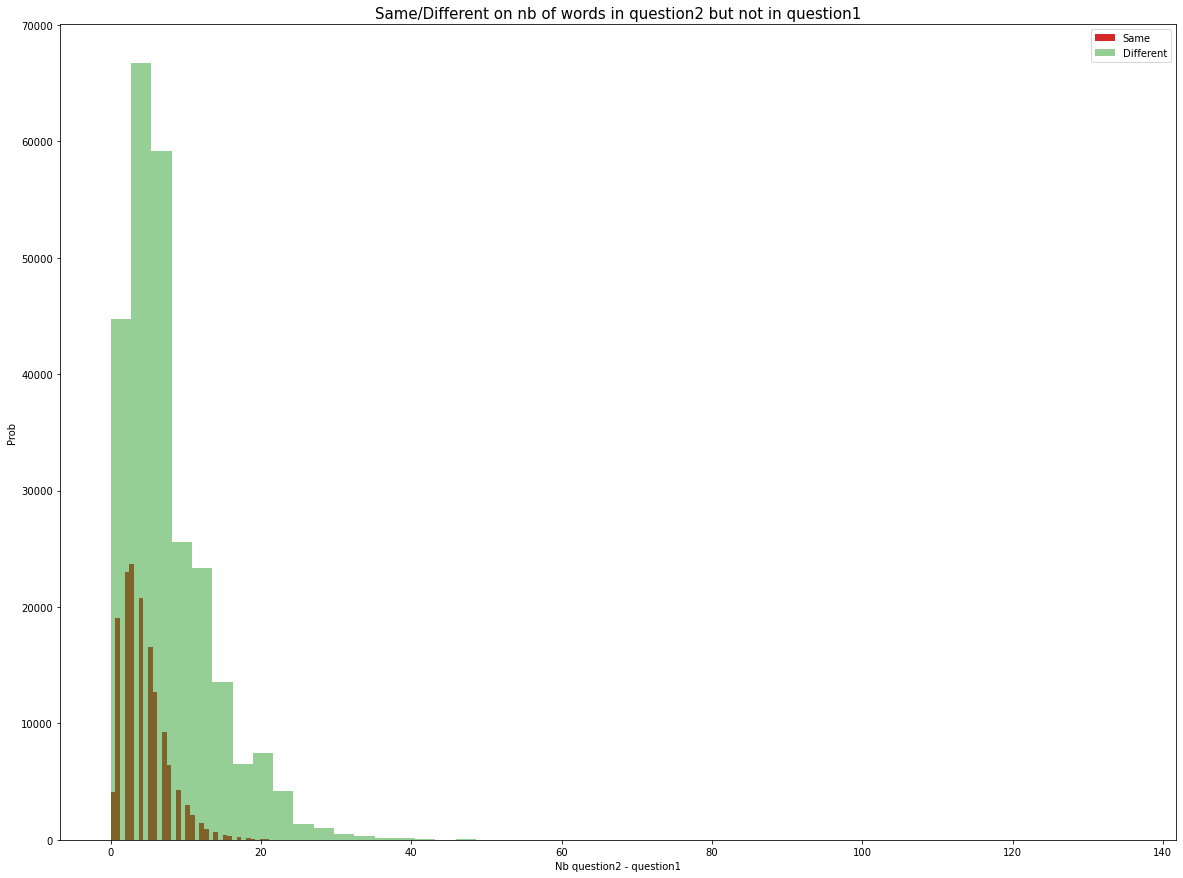

In [15]:
palette = sns.color_palette()
plot.figure(figsize=(20, 15))
plot.hist(train_dataframe['nb_words_question2-question1'][train_dataframe['is_duplicate']==1],bins=50,color=palette[3],label='Same')
plot.hist(train_dataframe['nb_words_question2-question1'][train_dataframe['is_duplicate']==0],bins=50,color=palette[2],label='Different',alpha = 0.5)
plot.title('Same/Different on nb of words in question2 but not in question1', fontsize=15)
plot.xlabel('Nb question2 - question1')
plot.ylabel('Prob')
plot.legend()

In [17]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_dataframe['is_duplicate'], train_dataframe['nb_words_question1-question2']))

Original AUC: 0.3206848227303282


## try to compute tricky ratios instead of simple counts


In [25]:
train_dataframe['nb_words_question1']=train_dataframe['question1'].apply(lambda s: len(s.split()))
train_dataframe['nb_words_question2']=train_dataframe['question2'].apply(lambda s: len(s.split()))

train_dataframe['nb_common_words/(nb_words_question1+nb_words_question2)']=train_dataframe['nb_common_words']/(train_dataframe['nb_words_question1']+train_dataframe['nb_words_question2'])

train_dataframe['(nb_words_question1-question2+nb_words_question2-question1)/(nb_words_question1+nb_words_question2)']=(train_dataframe['nb_words_question1-question2']+train_dataframe['nb_words_question2-question1'])/(train_dataframe['nb_words_question1']+train_dataframe['nb_words_question2'])






train_dataframe['nb_common_words_in_question1']=train_dataframe.apply(lambda r: len(list(set(r.common_words)&set(r.question1.split()))),axis=1)



train_dataframe['nb_common_words_in_question2']=train_dataframe.apply(lambda r: len(list(set(r.common_words)&set(r.question2.split()))),axis=1)


train_dataframe['(nb_common_words_in_question1+nb_common_words_in_question2)/(nb_words_question1+nb_words_question2)']= \
    (train_dataframe['nb_common_words_in_question1']+train_dataframe['nb_common_words_in_question2'])/(train_dataframe['nb_words_question1']+train_dataframe['nb_words_question2'])







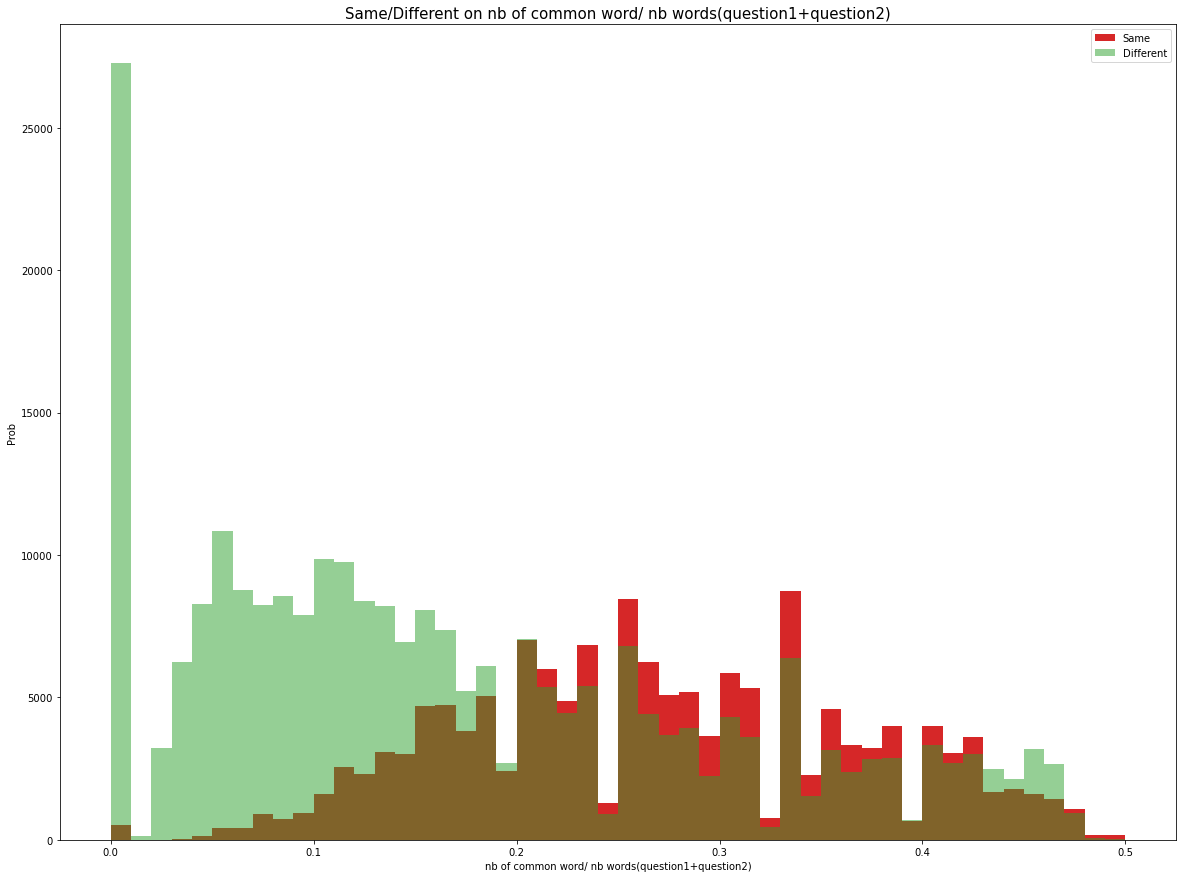

In [169]:
palette = sns.color_palette()
plot.figure(figsize=(20, 15))
plot.hist(train_dataframe['nb_common_words/(nb_words_question1+nb_words_question2)'][train_dataframe['is_duplicate']==1],bins=50,color=palette[3],label='Same')
plot.hist(train_dataframe['nb_common_words/(nb_words_question1+nb_words_question2)'][train_dataframe['is_duplicate']==0],bins=50,color=palette[2],label='Different',alpha = 0.5)
plot.title('Same/Different on nb of common word/ nb words(question1+question2)', fontsize=15)
plot.xlabel('nb of common word/ nb words(question1+question2)')
plot.ylabel('Prob')
plot.legend()

In [172]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_dataframe['is_duplicate'], train_dataframe['nb_common_words/(nb_words_question1+nb_words_question2)']))

Original AUC: 0.7347730967620376


In [26]:

from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_dataframe['is_duplicate'], train_dataframe['(nb_words_question1-question2+nb_words_question2-question1)/(nb_words_question1+nb_words_question2)']))



Original AUC: 0.2758056550886985


In [27]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_dataframe['is_duplicate'], train_dataframe['(nb_common_words_in_question1+nb_common_words_in_question2)/(nb_words_question1+nb_words_question2)']))

Original AUC: 0.7347730967620376


In [28]:
train_dataframe

,id,qid1,qid2,question1,question2,is_duplicate,common_words,nb_common_words,nb_words_question1-question2,nb_words_question2-question1,nb_words_question1,nb_words_question2,nb_common_words/(nb_words_question1+nb_words_question2),(nb_words_question1-question2+nb_words_question2-question1)/(nb_words_question1+nb_words_question2),nb_common_words_in_question1,nb_common_words_in_question2,(nb_common_words_in_question1+nb_common_words_in_question2)/(nb_words_question1+nb_words_question2,(nb_common_words_in_question1+nb_common_words_in_question2)/(nb_words_question1+nb_words_question2)
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[is, to, the, step, share, by, invest, in, Wha...",10,2,1,14,12,0.384615,0.115385,10,10,0.769231,0.769231
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[the, (Koh-i-Noor), Kohinoor, What]",4,4,8,8,13,0.190476,0.571429,4,4,0.380952,0.380952
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[How, speed, can]",3,11,7,14,10,0.125000,0.750000,3,3,0.250000,0.250000
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,[],0,10,9,11,9,0.000000,0.950000,0,0,0.000000,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[Which, in]",2,11,5,13,7,0.100000,0.800000,2,2,0.200000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,"[are, there, latest, version?, the, How, keywo...",9,4,3,14,13,0.333333,0.259259,9,9,0.666667,0.666667
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,"[is, there, after, life, death?]",5,3,4,8,9,0.294118,0.411765,5,5,0.588235,0.588235
404287,404287,537928,537929,What is one coin?,What's this coin?,0,[coin?],1,3,2,4,3,0.142857,0.714286,1,1,0.285714,0.285714
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,[of],1,16,22,17,25,0.023810,0.904762,1,1,0.047619,0.047619


In [ ]:
## Build our final train dataset

In [31]:
final_train_dataframe=pandas.concat([train_dataframe['nb_common_words']],axis=1)



## separate training and test



In [50]:
from sklearn.model_selection import train_test_split
train,test,is_duplicate_train,is_duplicate_test = train_test_split(final_train_dataframe,train_dataframe['is_duplicate'],random_state=42)


## build a *very naive* bayes model

In [55]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier=GaussianNB()
naive_bayes_classifier.fit(train,is_duplicate_train)

test_prediction=naive_bayes_classifier.predict(test)
from sklearn.metrics import classification_report

print(classification_report(is_duplicate_test,test_prediction))


precision    recall  f1-score   support

           0       0.63      1.00      0.77     63559
           1       0.00      0.00      0.00     37514

    accuracy                           0.63    101073
   macro avg       0.31      0.50      0.39    101073
weighted avg       0.40      0.63      0.49    101073



## prepare our challenge dataset for prediction



In [57]:
challenge_dataframe['common_words'] = challenge_dataframe.apply(lambda r: list(set(r.question1.split())&set(r.question2.split())), axis=1)
challenge_dataframe['nb_common_words'] = challenge_dataframe.apply(lambda r: len(list(set(r.question1.split())&set(r.question2.split()))), axis=1)

challenge_dataframe['nb_words_question1-question2'] = challenge_dataframe.apply(lambda r: len(list(set(r.question1.split())-set(r.question2.split()))), axis=1)
challenge_dataframe['nb_words_question2-question1'] = challenge_dataframe.apply(lambda r: len(list(set(r.question2.split())-set(r.question1.split()))), axis=1)

challenge_dataframe['nb_words_question1']=challenge_dataframe['question1'].apply(lambda s: len(s.split()))
challenge_dataframe['nb_words_question2']=challenge_dataframe['question2'].apply(lambda s: len(s.split()))

challenge_dataframe['nb_common_words/(nb_words_question1+nb_words_question2)']=challenge_dataframe['nb_common_words']/(challenge_dataframe['nb_words_question1']+challenge_dataframe['nb_words_question2'])

challenge_dataframe['(nb_words_question1-question2+nb_words_question2-question1)/(nb_words_question1+nb_words_question2)']=(challenge_dataframe['nb_words_question1-question2']+challenge_dataframe['nb_words_question2-question1'])/(challenge_dataframe['nb_words_question1']+challenge_dataframe['nb_words_question2'])

challenge_dataframe['nb_common_words_in_question1']=challenge_dataframe.apply(lambda r: len(list(set(r.common_words)&set(r.question1.split()))),axis=1)
challenge_dataframe['nb_common_words_in_question2']=challenge_dataframe.apply(lambda r: len(list(set(r.common_words)&set(r.question2.split()))),axis=1)
challenge_dataframe['(nb_common_words_in_question1+nb_common_words_in_question2)/(nb_words_question1+nb_words_question2)']= \
    (challenge_dataframe['nb_common_words_in_question1']+challenge_dataframe['nb_common_words_in_question2'])/(challenge_dataframe['nb_words_question1']+challenge_dataframe['nb_words_question2'])

In [75]:
final_challenge_input=pandas.concat([challenge_dataframe['nb_common_words']],axis=1)
prediction_challenge=pandas.Series(naive_bayes_classifier.predict(final_challenge_input))
final_challenge = pandas.concat([challenge_dataframe['test_id'],prediction_challenge],keys=['test_id','is_duplicate'],axis=1)
final_challenge.to_csv('../Results/naivebayes_nb_common_words_unbalanced.csv',index=False)

In [82]:
final_train_dataframe=pandas.concat([train_dataframe['(nb_common_words_in_question1+nb_common_words_in_question2)/(nb_words_question1+nb_words_question2)']],axis=1)
train,test,is_duplicate_train,is_duplicate_test = train_test_split(final_train_dataframe,train_dataframe['is_duplicate'],random_state=42)

naive_bayes_classifier_ratio_common_words=GaussianNB()
naive_bayes_classifier_ratio_common_words.fit(train,is_duplicate_train)

test_prediction=naive_bayes_classifier_ratio_common_words.predict(test)
from sklearn.metrics import classification_report

print(classification_report(is_duplicate_test,test_prediction))


precision    recall  f1-score   support

           0       0.72      0.76      0.74     63559
           1       0.55      0.50      0.52     37514

    accuracy                           0.66    101073
   macro avg       0.64      0.63      0.63    101073
weighted avg       0.66      0.66      0.66    101073



In [84]:
final_challenge_input=pandas.concat([challenge_dataframe['(nb_common_words_in_question1+nb_common_words_in_question2)/(nb_words_question1+nb_words_question2)']],axis=1)
prediction_challenge=pandas.Series(naive_bayes_classifier_ratio_common_words.predict(final_challenge_input))
final_challenge = pandas.concat([challenge_dataframe['test_id'],prediction_challenge],keys=['test_id','is_duplicate'],axis=1)
final_challenge.to_csv('../Results/naivebayes_nb_common_words_ratio_unbalanced.csv',index=False)